In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
tts_type = pd.read_csv('/Volumes/Data2/RST/notebook/TTS OD/TTS_TYPE.csv')
tts_type['origin'] = tts_type['origin'] + 1000
tts_type['destination'] = tts_type['destination'] + 1000
tts_type['period'] = tts_type['type'].str.split('_', expand = True)[1].str.upper()



In [4]:
tts_check = tts_type[tts_type['type'].str[0:3] == 'raw']
tts_check['period'] = tts_type['type'].str.split('_', expand = True)[1].str.upper()
tts_check

/var/folders/zw/x46df3ms6r5391lyb_y98z600000gn/T/ipykernel_15862/123857249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tts_check['period'] = tts_type['type'].str.split('_', expand = True)[1].str.upper()


,origin,destination,type,total,period
0,1001,1018,raw_am,15.00000,AM
1,1001,1035,raw_am,14.00000,AM
2,1001,1057,raw_am,20.00000,AM
3,1001,1068,raw_am,14.00000,AM
4,1001,1212,raw_am,8.00000,AM
...,...,...,...,...,...
23935,1624,1493,raw_am,44.00000,AM
23937,1624,1525,raw_am,44.00000,AM
23938,1624,1542,raw_md,26.00000,MD
23939,1624,1595,raw_pm,14.00000,PM


In [5]:
df = pd.read_csv('Results/AM_RT_GE.csv')
df = df.append(pd.read_csv('Results/PM_RT_GE.csv')).append(pd.read_csv('Results/MD_RT_GE.csv')).append(
    pd.read_csv('Results/EM_RT_GE.csv')).append(pd.read_csv('Results/EV_RT_GE.csv'))
df

,o_node,d_node,origin,destination,travel_time,date,period,trial
0,1250-0-7-6,1001-0-99-99,1250,1001,40.00000,2019-11-28,AM,0
1,1540-0-7-6,1001-0-99-99,1540,1001,36.00000,2019-11-28,AM,0
2,1211-0-7-6,1003-0-99-99,1211,1003,68.00000,2019-11-28,AM,0
3,1534-0-7-6,1003-0-99-99,1534,1003,69.00000,2019-11-28,AM,0
4,1105-0-7-6,1004-0-99-99,1105,1004,75.00000,2019-11-28,AM,0
...,...,...,...,...,...,...,...,...
218059,1210-0-20-56,1621-0-99-99,1210,1621,94.00000,2019-11-14,EV,5
218060,1391-0-20-56,1621-0-99-99,1391,1621,97.00000,2019-11-14,EV,5
218061,1566-0-20-56,1621-0-99-99,1566,1621,37.00000,2019-11-14,EV,5
218062,1614-0-20-56,1622-0-99-99,1614,1622,26.00000,2019-11-14,EV,5


In [6]:
check = df.groupby(['origin', 'destination', 'period', 'date']).count()[['trial']].reset_index()

In [7]:
check[check['trial']!=6]

,origin,destination,period,date,trial


In [8]:
tts_check = tts_check.merge(check, how = 'left')
tts_check[tts_check['trial'] != 6].iloc[60:80]

,origin,destination,type,total,period,date,trial
361278,1487,1487,raw_ev,9.00000,EV,NaN,NaN
362665,1490,1490,raw_md,31.00000,MD,NaN,NaN
366560,1496,1496,raw_md,37.00000,MD,NaN,NaN
373139,1517,1517,raw_am,24.00000,AM,NaN,NaN
382006,1532,1532,raw_md,13.00000,MD,NaN,NaN
386187,1538,1538,raw_pm,11.00000,PM,NaN,NaN
387662,1542,1542,raw_md,21.00000,MD,NaN,NaN
392547,1555,1555,raw_am,32.00000,AM,NaN,NaN
393472,1559,1559,raw_md,37.00000,MD,NaN,NaN
394045,1560,1560,raw_pm,33.00000,PM,NaN,NaN


In [9]:
tts_check[tts_check['trial'] != 6]['trial'].sum()

0.0

In [10]:
tts_check[tts_check['trial'].isna() & (tts_check['origin'] != tts_check['destination'])].groupby('period').sum()[['total']]

,total
period,


In [11]:
df_avg = df.groupby(['origin', 'destination', 'date', 'period']).mean()[['travel_time']].reset_index()
df_avg

,origin,destination,date,period,travel_time
0,1001,1018,2019-11-14,AM,37.50000
1,1001,1018,2019-11-28,AM,38.00000
2,1001,1018,2019-11-29,AM,39.16667
3,1001,1018,2019-12-02,AM,38.66667
4,1001,1018,2019-12-03,AM,38.16667
...,...,...,...,...,...
418611,1625,1045,2019-12-23,MD,111.00000
418612,1625,1045,2019-12-27,MD,108.66667
418613,1625,1045,2019-12-30,MD,110.00000
418614,1625,1045,2020-01-02,MD,107.83333


In [12]:
df_avg = df_avg.merge(tts_type)
df_avg

,origin,destination,date,period,travel_time,type,total
0,1001,1018,2019-11-14,AM,37.50000,raw_am,15.00000
1,1001,1018,2019-11-14,AM,37.50000,lep_am,0.06541
2,1001,1018,2019-11-14,AM,37.50000,rac_am,3.61754
3,1001,1018,2019-11-14,AM,37.50000,ab_am,0.00002
4,1001,1018,2019-11-14,AM,37.50000,bl_am,0.12666
...,...,...,...,...,...,...,...
2739633,1625,1045,2020-01-03,MD,107.33333,lep_md,0.29668
2739634,1625,1045,2020-01-03,MD,107.33333,rac_md,7.86259
2739635,1625,1045,2020-01-03,MD,107.33333,ab_md,0.04845
2739636,1625,1045,2020-01-03,MD,107.33333,bl_md,1.79742


In [13]:
df_avg = df_avg.merge(tts_type.groupby('type').sum()[['total']].reset_index().rename(columns = {'total':'od_total'}))

In [14]:
df_avg['ttt'] = df_avg['travel_time'] * df_avg['total']
df_avg['ge_raw'] = (1/df_avg['travel_time'])*(df_avg['total']/df_avg['od_total'])

In [15]:
df_avg.to_csv('RGE_avg.csv', index = False)

In [16]:
df_sum = df_avg.groupby(['date', 'period', 'type']).sum()[['ttt', 'ge_raw']].reset_index()

In [17]:
baseline = df_sum[df_sum['date'] == '2019-11-14'].copy()
baseline = baseline.drop(columns = ['date'])
baseline = baseline.rename(columns = {'ttt': 'ttt_base', 'ge_raw':'ge_base'})
baseline

,period,type,ttt_base,ge_base
0,AM,ab_am,17803.70047,0.02219
1,AM,bl_am,1033593.69665,0.02092
2,AM,c0_am,3043916.66667,0.02367
3,AM,imm_am,829676.65864,0.02136
4,AM,lep_am,544725.07584,0.02066
5,AM,lico_am,3230942.83333,0.02197
6,AM,rac_am,5883869.19042,0.02091
7,AM,raw_am,11328861.33333,0.02145
8,EM,ab_em,614.85124,0.01521
9,EM,bl_em,45368.43625,0.01394


In [18]:
df_sum = df_sum.merge(baseline)

In [19]:
df_sum['rel_ge'] = df_sum['ge_raw']/df_sum['ge_base'] * 100
df_sum['additional_tt'] = df_sum['ttt'] - df_sum['ttt_base']

In [20]:
df_sum['group'] = df_sum['type'].str.split('_', expand = True)[0]

In [21]:
df_sum[df_sum['group'] == 'raw'].sort_values(by = 'rel_ge')

,date,period,type,ttt,ge_raw,ttt_base,ge_base,rel_ge,additional_tt,group
343,2019-12-17,EM,raw_em,584676.33333,0.00961,361265.33333,0.01471,65.27989,223411.00000,raw
347,2019-12-23,EM,raw_em,488912.66667,0.01167,361265.33333,0.01471,79.34104,127647.33333,raw
169,2019-12-19,AM,raw_am,15233967.16667,0.01741,11328861.33333,0.02145,81.15928,3905105.83333,raw
157,2019-12-02,AM,raw_am,15015161.33333,0.01753,11328861.33333,0.02145,81.73160,3686300.00000,raw
695,2019-12-17,MD,raw_md,3916865.00000,0.02138,2840664.83333,0.02593,82.45730,1076200.16667,raw
...,...,...,...,...,...,...,...,...,...,...
341,2019-12-12,EM,raw_em,328111.83333,0.01630,361265.33333,0.01471,110.80810,-33153.50000,raw
340,2019-12-11,EM,raw_em,328605.50000,0.01630,361265.33333,0.01471,110.81202,-32659.83333,raw
348,2019-12-27,EM,raw_em,325526.66667,0.01635,361265.33333,0.01471,111.11673,-35738.66667,raw
351,2020-01-03,EM,raw_em,325009.66667,0.01645,361265.33333,0.01471,111.80422,-36255.66667,raw


In [22]:
df_sum

,date,period,type,ttt,ge_raw,ttt_base,ge_base,rel_ge,additional_tt,group
0,2019-11-14,AM,ab_am,17803.70047,0.02219,17803.70047,0.02219,100.00000,0.00000,ab
1,2019-11-28,AM,ab_am,19683.70726,0.02058,17803.70047,0.02219,92.74809,1880.00678,ab
2,2019-11-29,AM,ab_am,19570.20777,0.02067,17803.70047,0.02219,93.13216,1766.50730,ab
3,2019-12-02,AM,ab_am,22907.40966,0.01868,17803.70047,0.02219,84.14735,5103.70918,ab
4,2019-12-03,AM,ab_am,20540.36613,0.01994,17803.70047,0.02219,89.84853,2736.66566,ab
...,...,...,...,...,...,...,...,...,...,...
875,2019-12-23,PM,raw_pm,11834011.33333,0.02028,10610566.50000,0.02254,89.98689,1223444.83333,raw
876,2019-12-27,PM,raw_pm,10753369.00000,0.02220,10610566.50000,0.02254,98.49239,142802.50000,raw
877,2019-12-30,PM,raw_pm,10950544.66667,0.02183,10610566.50000,0.02254,96.86424,339978.16667,raw
878,2020-01-02,PM,raw_pm,10933646.33333,0.02184,10610566.50000,0.02254,96.92878,323079.83333,raw


# Outliers

Dec 17 EM

Dec 23 EM

Dec 20 EM


In [23]:
df_sum.to_csv('RGE_sum.csv', index = False)

In [24]:
df_sum['date'] = pd.DatetimeIndex(df_sum['date'])

In [25]:
df_raw = df_sum[df_sum['group'] == 'raw']

In [26]:
df_raw.sort_values(by = 'rel_ge')

,date,period,type,ttt,ge_raw,ttt_base,ge_base,rel_ge,additional_tt,group
343,2019-12-17,EM,raw_em,584676.33333,0.00961,361265.33333,0.01471,65.27989,223411.00000,raw
347,2019-12-23,EM,raw_em,488912.66667,0.01167,361265.33333,0.01471,79.34104,127647.33333,raw
169,2019-12-19,AM,raw_am,15233967.16667,0.01741,11328861.33333,0.02145,81.15928,3905105.83333,raw
157,2019-12-02,AM,raw_am,15015161.33333,0.01753,11328861.33333,0.02145,81.73160,3686300.00000,raw
695,2019-12-17,MD,raw_md,3916865.00000,0.02138,2840664.83333,0.02593,82.45730,1076200.16667,raw
...,...,...,...,...,...,...,...,...,...,...
341,2019-12-12,EM,raw_em,328111.83333,0.01630,361265.33333,0.01471,110.80810,-33153.50000,raw
340,2019-12-11,EM,raw_em,328605.50000,0.01630,361265.33333,0.01471,110.81202,-32659.83333,raw
348,2019-12-27,EM,raw_em,325526.66667,0.01635,361265.33333,0.01471,111.11673,-35738.66667,raw
351,2020-01-03,EM,raw_em,325009.66667,0.01645,361265.33333,0.01471,111.80422,-36255.66667,raw


In [27]:
plt.rcParams['figure.dpi'] = 300

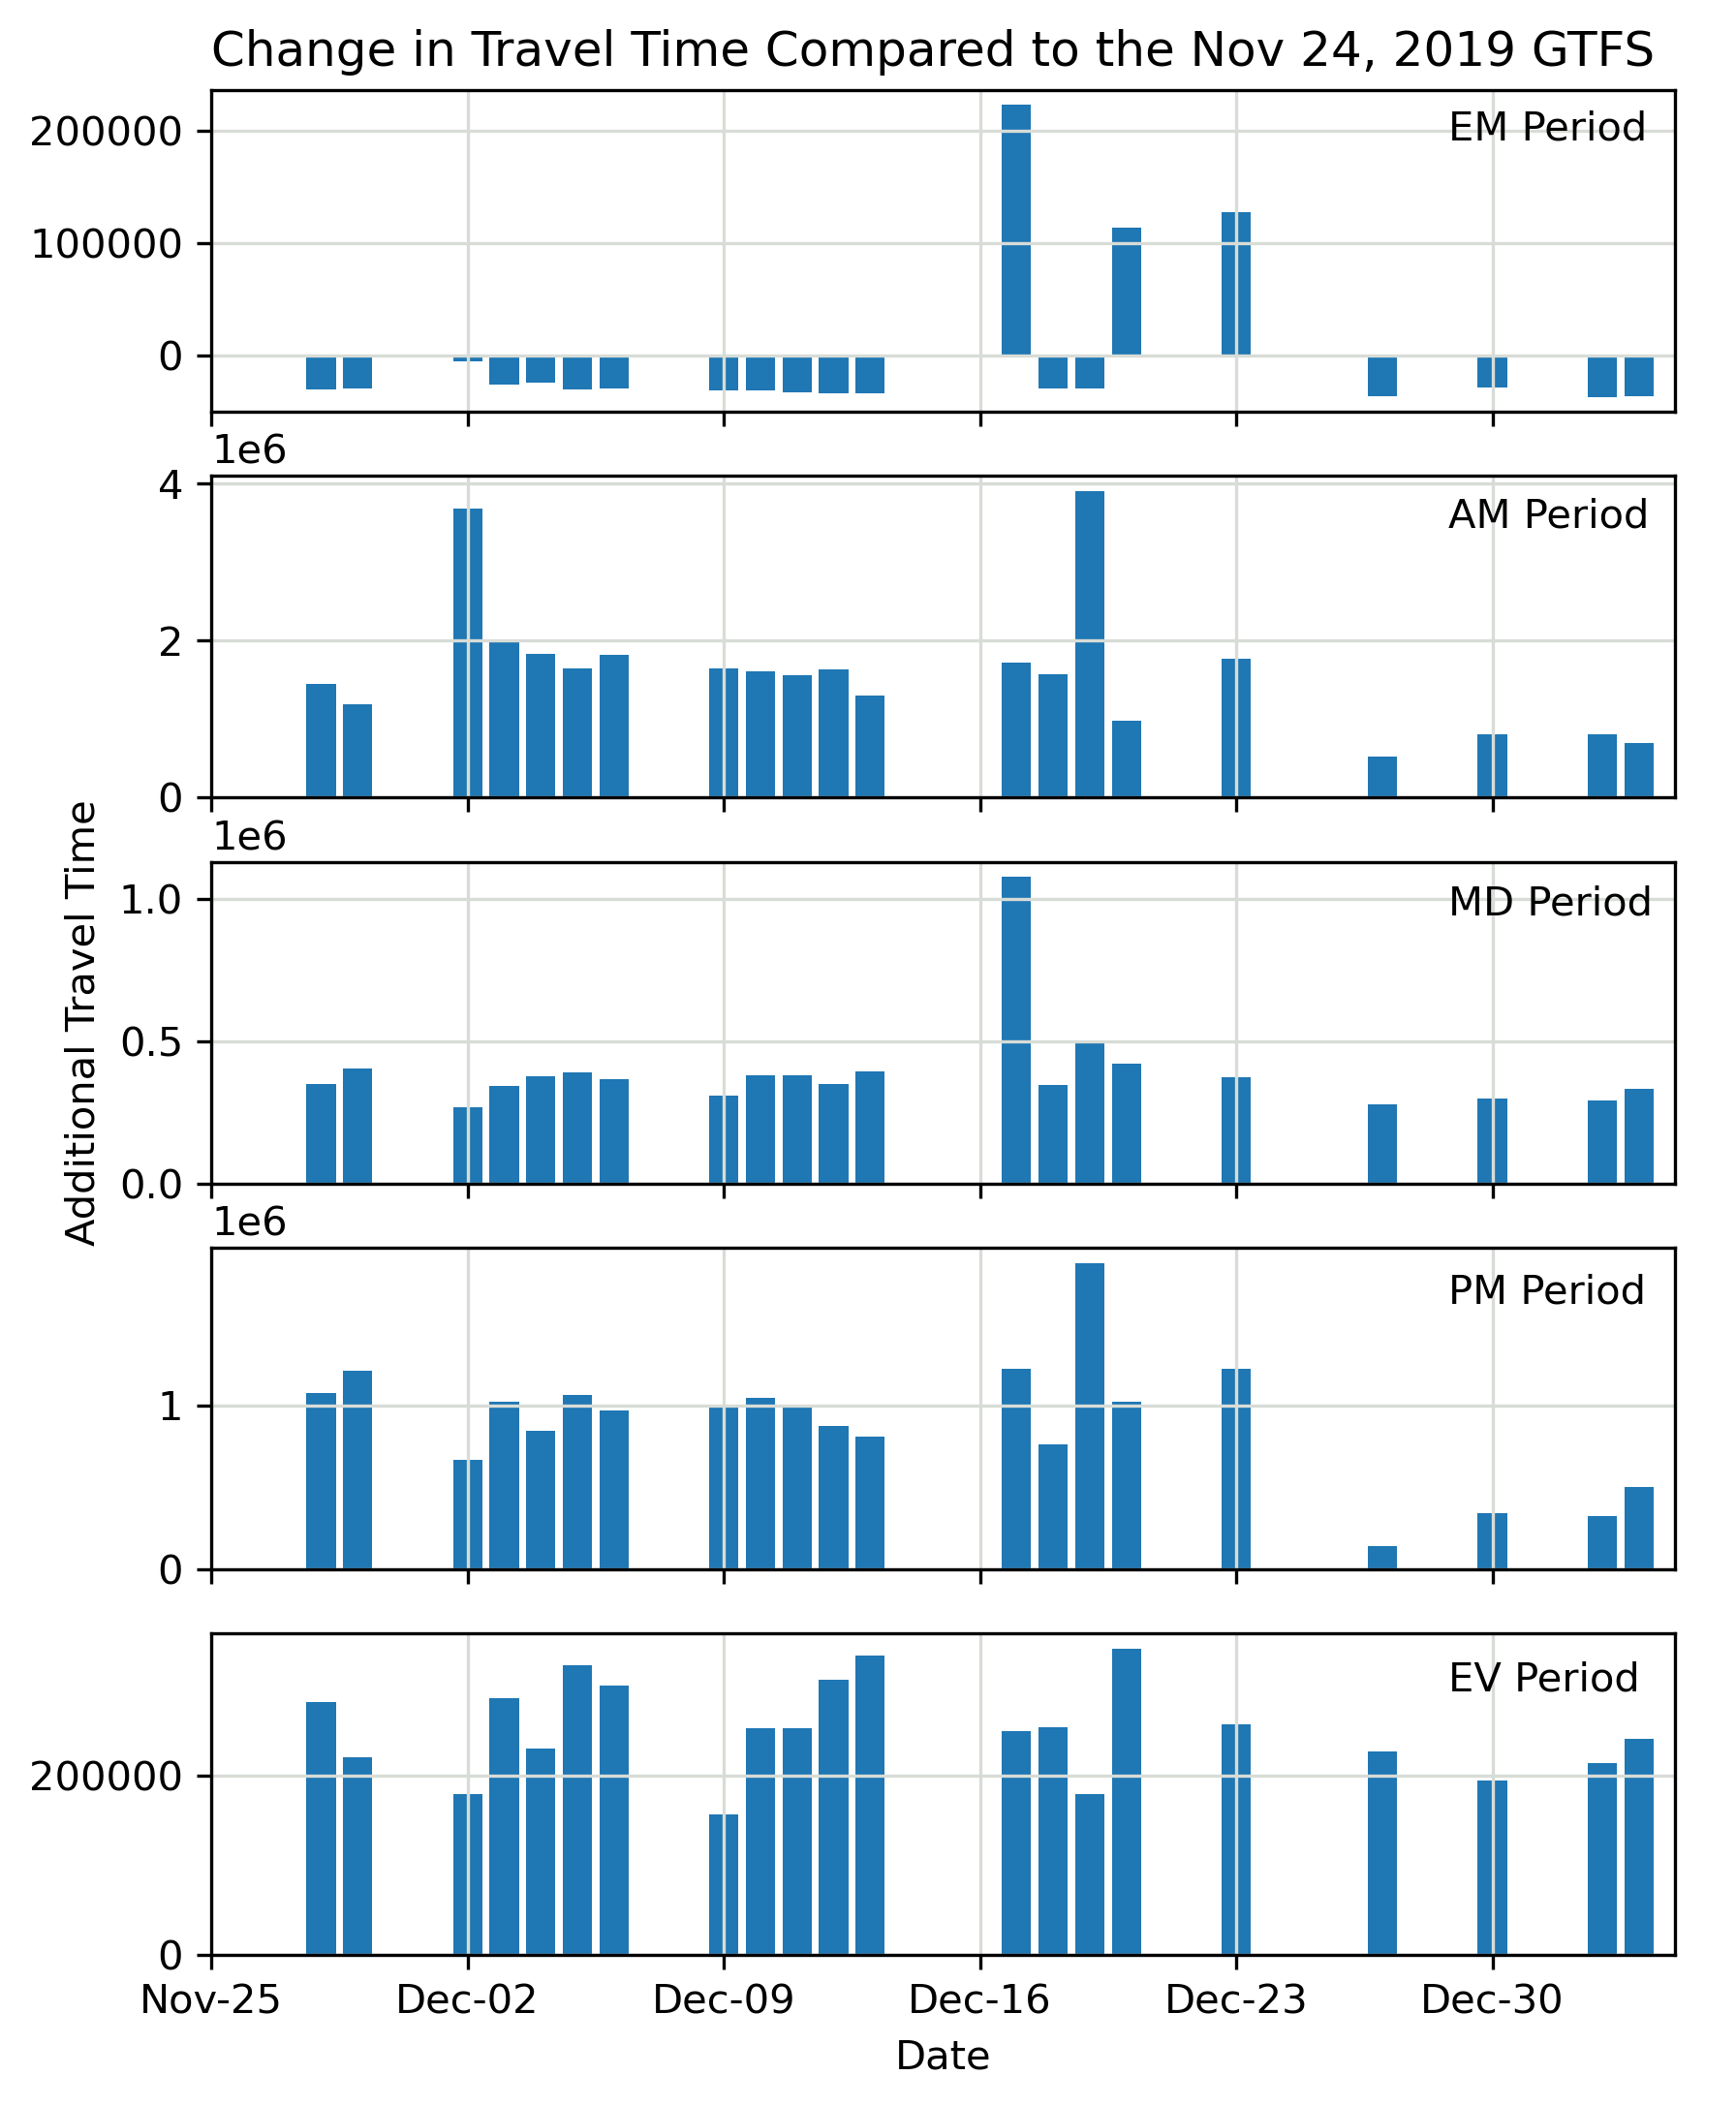

In [28]:
fig, ax = plt.subplots(5)

i = 0
y_str = 0.86

period_list = ['EM','AM','MD','PM','EV']

for period in period_list:
    
    df_sub = df_raw[df_raw['period'] == period]
    
    ax[i].bar(df_sub['date'], df_sub['additional_tt'])
    
    ax[i].set_xlim([datetime.date(2019,11,26), datetime.date(2020,1,4)])
    #ax[i].set_ylim([0,75])
    
    ax[i].set_xticks([datetime.date(2019,11,25),
                     datetime.date(2019,12,2),
                     datetime.date(2019,12,9),
                     datetime.date(2019,12,16),
                     datetime.date(2019,12,23),
                     datetime.date(2019,12,30)])

    if i in [0,1,2,3]:
        ax[i].set_xticklabels('')
    else:
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    
        
    fig.text(s = period + ' Period', x = 0.78, y = y_str)

    ax[i].grid(color = 'xkcd:light grey')
    
    
    
    i = i + 1
    y_str = y_str - 0.157
    
fig.add_subplot(111, frameon=False)


plt.xlabel('Date')
plt.ylabel('Additional Travel Time')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title('Change in Travel Time Compared to the Nov 24, 2019 GTFS', ha = 'left', x = 0)

fig.set_size_inches(6.5,8.5)

plt.savefig('summary_ttt.png', dpi = 300, bbox_inches = "tight")

In [29]:
df_sum = df_sum[~((df_sum['date'] == '2019-12-17') & (df_sum['period'] == 'EM'))].copy().reset_index(drop = True)
df_sum = df_sum[~((df_sum['date'] == '2019-12-20') & (df_sum['period'] == 'EM'))].copy().reset_index(drop = True)
df_sum = df_sum[~((df_sum['date'] == '2019-12-23') & (df_sum['period'] == 'EM'))].copy().reset_index(drop = True)


df_raw = df_sum[df_sum['group'] == 'raw']

In [30]:
df_sum.to_csv('RGE_sum_no-outliers.csv', index = False)

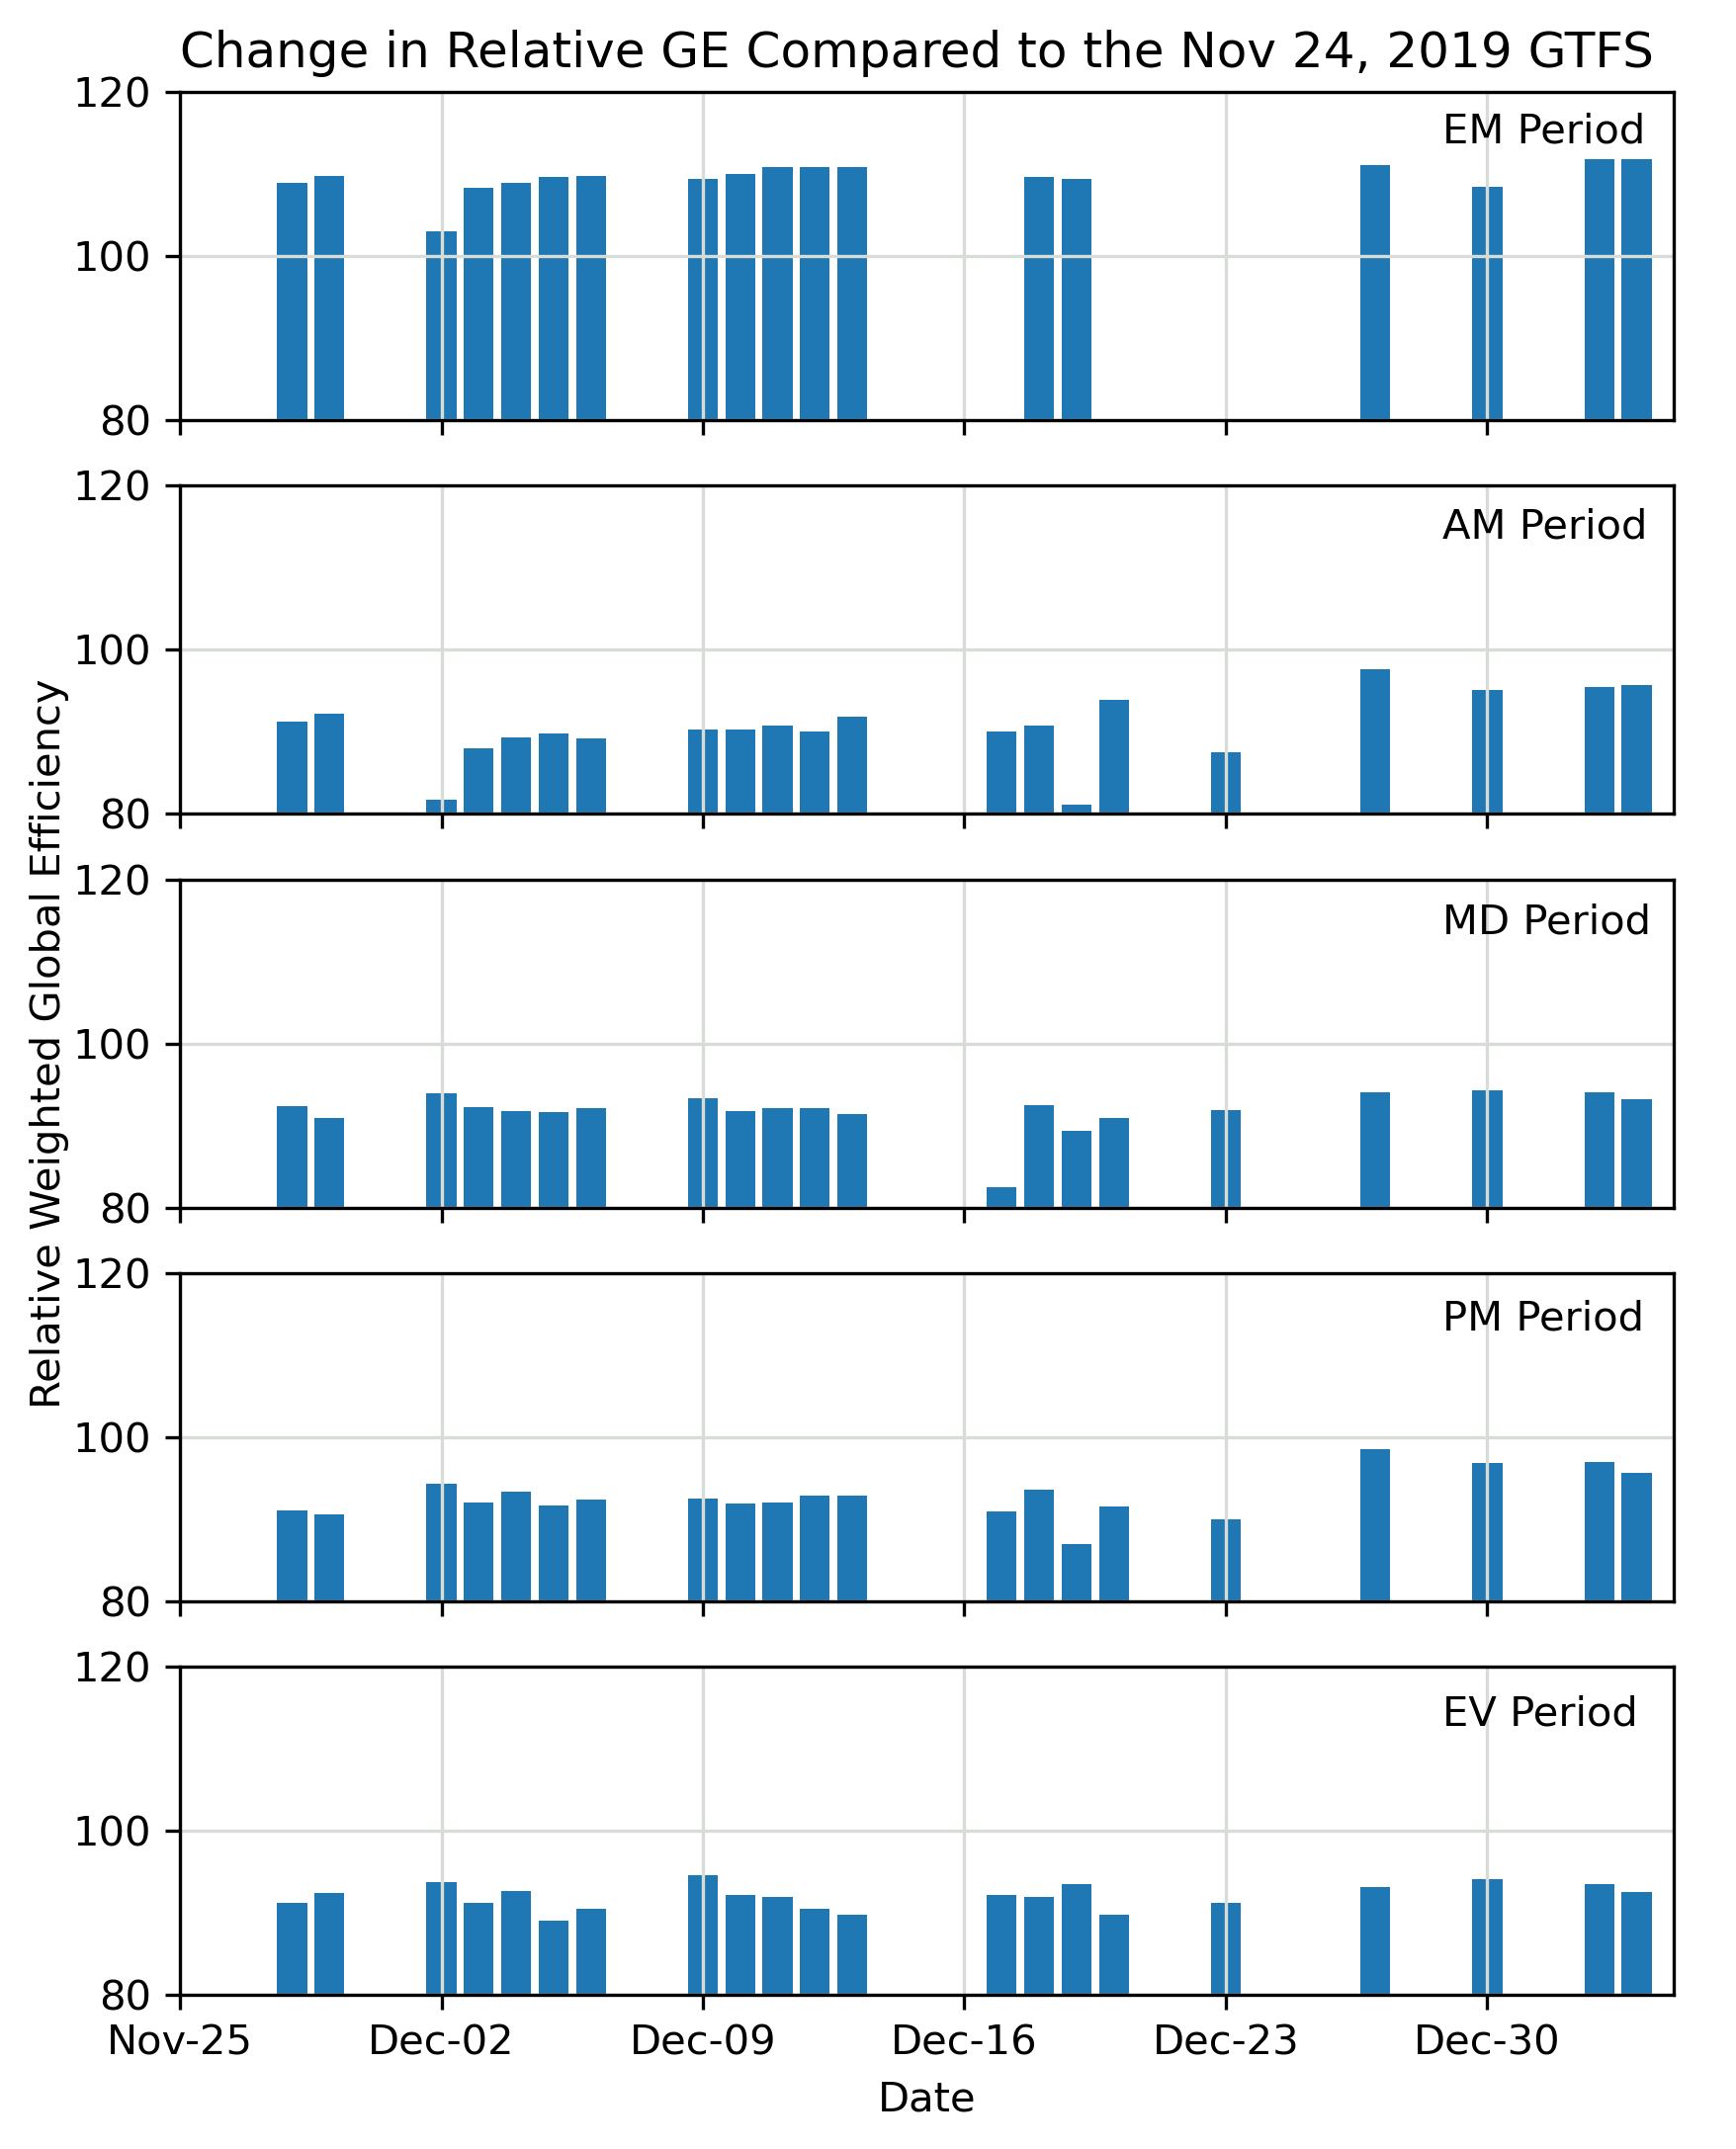

In [31]:
fig, ax = plt.subplots(5)

i = 0
y_str = 0.86

period_list = ['EM','AM','MD','PM','EV']

for period in period_list:
    
    df_sub = df_raw[df_raw['period'] == period]
    
    ax[i].bar(df_sub['date'], df_sub['rel_ge'])
    
    ax[i].set_xlim([datetime.date(2019,11,26), datetime.date(2020,1,4)])
    ax[i].set_ylim([80,120])
    
    ax[i].set_xticks([datetime.date(2019,11,25),
                     datetime.date(2019,12,2),
                     datetime.date(2019,12,9),
                     datetime.date(2019,12,16),
                     datetime.date(2019,12,23),
                     datetime.date(2019,12,30)])

    if i in [0,1,2,3]:
        ax[i].set_xticklabels('')
    else:
        ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    
        
    fig.text(s = period + ' Period', x = 0.78, y = y_str)

    ax[i].grid(color = 'xkcd:light grey')
    
    
    
    i = i + 1
    y_str = y_str - 0.157
    
fig.add_subplot(111, frameon=False)


plt.xlabel('Date')
plt.ylabel('Relative Weighted Global Efficiency')
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.title('Change in Relative GE Compared to the Nov 24, 2019 GTFS', ha = 'left', x = 0)

fig.set_size_inches(6.5,8.5)

plt.savefig('summary_ge.png', dpi = 300, bbox_inches = "tight")